In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,MeanShift
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('../raw data/common purchases.csv',index_col='Member_number')
df.head()

,UHT-milk,baking powder,beef,berries,beverages,bottled beer,bottled water,brown bread,butter,butter milk,...,specialty bar,specialty chocolate,sugar,tropical fruit,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Let's see what the intrinsic dimensionality of the dataset is.  We can use this to
determine the number of potential clusters for customers.

<BarContainer object of 77 artists>

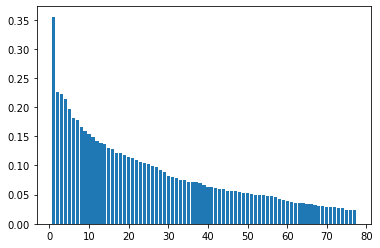

In [4]:
purchase_matrix=df.reset_index(drop=True).to_numpy()
pca_model=PCA()
pca_model.fit(purchase_matrix)
plt.bar(height=pca_model.explained_variance_,x=np.linspace(1,len(pca_model.explained_variance_),len(pca_model.explained_variance_)))

No help from PCA.  Let's see if there's a natural elbow when considering 
numbers of clusters for KMeans clustering.

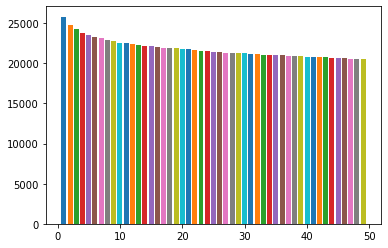

In [5]:
for n_clusters in range(1,50):
    km_model=KMeans(n_clusters=n_clusters)
    km_model.fit(purchase_matrix)
    plt.bar(n_clusters,km_model.inertia_)
plt.show()

There's no elbow at all and the inertia for each cluster is pretty high.  I'm not convinced this dataset has any intrinsic clusters that would provide predictive value, so I'll refrain from giving customers a label.

Without loss of generality, let's settle on a business problem: Can we predict which customers
will be more likely to buy "frozen meals", given only their other purchases?  Let's split into train and test groups on that product.

In [6]:
X=df.drop(columns=['frozen meals'])
y=df['frozen meals']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)